##Setup

You will need to make a copy of this notebook in your Google Drive before you can edit the homework files. You can do so with **File &rarr; Save a copy in Drive**.

In [4]:
# !pip uninstall gym
# !pip install --upgrade gym
# !pip install gym
# !pip install Box2D
# !pip install box2d-py

# !pip install box2d box2d-kengz
# !pip install Box2D
# !pip install -e '.[box2d]'

# !pip install 'gym[all]'

In [5]:
# import gym
# env = gym.make('LunarLander-v2')

In [6]:
#@title mount your Google Drive
#@markdown Your work will be stored in a folder called `cds_rl_2022` by default to prevent Colab instance timeouts from deleting your edits.

import os
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
#@title set up mount symlink

DRIVE_PATH = '/content/gdrive/My\ Drive/cds_rl_2022'
DRIVE_PYTHON_PATH = DRIVE_PATH.replace('\\', '')
if not os.path.exists(DRIVE_PYTHON_PATH):
    !mkdir $DRIVE_PATH

## the space in `My Drive` causes some issues,
## make a symlink to avoid this
SYM_PATH = '/content/cds_rl_2022'
if not os.path.exists(SYM_PATH):
    !ln -s $DRIVE_PATH $SYM_PATH

In [8]:
#@title apt install requirements

#@markdown Run each section with Shift+Enter

#@markdown Double-click on section headers to show code.

!apt update 
!apt install -y --no-install-recommends \
        build-essential \
        curl \
        git \
        git-lfs \
        gnupg2 \
        make \
        cmake \
        ffmpeg \
        swig \
        libz-dev \
        unzip \
        zlib1g-dev \
        libglfw3 \
        libglfw3-dev \
        libxrandr2 \
        libxinerama-dev \
        libxi6 \
        libxcursor-dev \
        libgl1-mesa-dev \
        libgl1-mesa-glx \
        libglew-dev \
        libosmesa6-dev \
        lsb-release \
        ack-grep \
        patchelf \
        wget \
        xpra \
        xserver-xorg-dev \
        xvfb \
        python-opengl \
        ffmpeg

# set up git lfs
!git lfs install

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [788 kB]
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelea

In [9]:
#@title install mujoco-py

%pip install free-mujoco-py

# Cythonizes pkg on the first run
import mujoco_py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.1 MB 4.6 MB/s 
     |████████████████████████████████| 203 kB 62.7 MB/s 
     |████████████████████████████████| 3.4 MB 49.4 MB/s 
     |████████████████████████████████| 3.1 MB 51.1 MB/s 
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: imageio
    Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Compiling /usr/local/lib/python3.7/dist-packages/mujoco_py/cymj.pyx because it changed.
[1/1] Cythonizing /usr/local/lib/python3.7/dist-packages/mujoco_py/cymj.pyx
running build_ext
building 'mujoco_py.cymj' extension
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7/usr
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7/usr/local
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7/usr/local/lib
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuexten

### Clone/update repo

Now we need to clone the HW3 codebase. There are two options:

1. Git clone the [repository](https://github.com/pkuderov/mipt-rl-hw-2022.git), install requirements, start coding HW3. This's the only option if you haven't cloned the repo yet for HW1. 
    If you have the repo already cloned, it's better to follow the 2-nd option. Otherwise, you will need to move the old `rl_hw` folder first. But don't delete it - make sure you've kept the HW1 solution as you will need it for this assignment!

2. Use already cloned local repository in `rl_hw`. Save the HW1 solution to the separate branch, then git pull changes from the remote upstream to get HW3 codebase.

In [10]:
#@title clone homework repo (option #1)
%cd $SYM_PATH
!git clone https://github.com/pkuderov/mipt-rl-hw-2022.git rl_hw
%cd rl_hw

/content/gdrive/My Drive/cds_rl_2022
fatal: destination path 'rl_hw' already exists and is not an empty directory.
/content/gdrive/My Drive/cds_rl_2022/rl_hw


In [11]:
#@title pull updated repo (option #2)
# Don't hesitate to update the script for yourself

# %cd $SYM_PATH/rl_hw
# # git commit before pulling
# !git checkout -b "hw2"
# !git add .
# !git commit -m "HW2 solution"
# !git checkout main

# # update
# !git pull

In [12]:
#@title install requirements (the same as for previous homeworks + gym[atari] is added)
%cd hw1
%pip install -r requirements.colab.txt
%pip install -e .

# also install hw3 package
%cd ../hw3
%pip install -e .

/content/gdrive/My Drive/cds_rl_2022/rl_hw/hw1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.2 MB/s 
     |████████████████████████████████| 448 kB 39.7 MB/s 
     |████████████████████████████████| 793 kB 46.0 MB/s 
     |████████████████████████████████| 793 kB 2.4 MB/s 
     |████████████████████████████████| 793 kB 56.1 MB/s 
     |████████████████████████████████| 792 kB 60.8 MB/s 
     |████████████████████████████████| 792 kB 60.2 MB/s 
     |████████████████████████████████| 791 kB 54.5 MB/s 
     |████████████████████████████████| 790 kB 59.4 MB/s 
     |████████████████████████████████| 788 kB 55.6 MB/s 
     |████████████████████████████████| 787 kB 57.3 MB/s 
     |████████████████████████████████| 786 kB 63.5 MB/s 
     |████████████████████████████████| 786 kB 65.3 MB/s 
     |████████████████████████████████| 785 kB 64.9 MB/s 
     |████████████████████████████████| 785 

In [ ]:
#@title set up the Ms. Pacman environment

import urllib.request
urllib.request.urlretrieve('http://www.atarimania.com/roms/Roms.rar','Roms.rar')

ATARI_PATH=f'{SYM_PATH}/Atari'

%pip install unrar
!unrar x Roms.rar
%mkdir $ATARI_PATH
%mv Roms.rar $ATARI_PATH
%mv 'HC ROMS' $ATARI_PATH
%mv 'ROMS' $ATARI_PATH
!python -m atari_py.import_roms $ATARI_PATH

In [ ]:
#@title set up virtual display

from pyvirtualdisplay import Display

display = Display(visible=0, size=(1400, 900))
display.start()

# For later
from hw3.infrastructure.colab_utils import (
    wrap_env,
    show_video
)

In [ ]:
#@title test virtual display

#@markdown If you see a video of a four-legged ant fumbling about, setup is complete!

import gym
import matplotlib
matplotlib.use('Agg')

env = wrap_env(gym.make("Ant-v2"))

observation = env.reset()
for i in range(10):
    env.render(mode='rgb_array')
    obs, rew, term, _ = env.step(env.action_space.sample() ) 
    if term:
        break;
            
env.close()
print('Loading video...')
show_video()

## Editing Code

To edit code, click the folder icon on the left menu. Navigate to the corresponding file (`cds_rl_2022/...`). Double click a file to open an editor. There is a timeout of about ~12 hours with Colab while it is active (and less if you close your browser window). We sync your edits to Google Drive so that you won't lose your work in the event of an instance timeout, but you will need to re-mount your Google Drive and re-install packages with every new instance.

## Run DQN and Double DQN

In [ ]:
#@title imports
import os
import time

from hw3.infrastructure.rl_trainer import RL_Trainer
from hw3.agents.dqn_agent import DQNAgent
from hw3.infrastructure.dqn_utils import get_env_kwargs

In [ ]:
#@title runtime arguments

class Args:

    def __getitem__(self, key):
        return getattr(self, key)

    def __setitem__(self, key, val):
        setattr(self, key, val)

    def __contains__(self, key):
        return hasattr(self, key)

    env_name = 'LunarLander-v3' #@param ['MsPacman-v0', 'LunarLander-v3', 'PongNoFrameSkip-v4']
    exp_name = 'q1' #@param ['q1']

    ## PDF will tell you how to set ep_len
    ## and discount for each environment
    ep_len = 200 #@param {type: "integer"}

    #@markdown batches and steps
    batch_size = 32 #@param {type: "integer"}
    eval_batch_size = 1000 #@param {type: "integer"}

    num_agent_train_steps_per_iter = 1 #@param {type: "integer"}

    num_critic_updates_per_agent_update = 1 #@param {type: "integer"}

    #@markdown Q-learning parameters
    double_q = True #@param {type: "boolean"}

    #@markdown system
    save_params = False #@param {type: "boolean"}
    no_gpu = False #@param {type: "boolean"}
    which_gpu = 0 #@param {type: "integer"}
    seed = 1 #@param {type: "integer"}

    #@markdown logging
    ## default is to not log video so
    ## that logs are small enough to be
    ## uploaded to gradscope
    video_log_freq =  -1 #@param {type: "integer"}
    scalar_log_freq =  10000#@param {type: "integer"}


args = Args()

## ensure compatibility with hw1 code
args['train_batch_size'] = args['batch_size']

if args['video_log_freq'] > 0:
    import warnings
    warnings.warn(
        '''\nLogging videos will make eventfiles too'''
        '''\nlarge for the autograder. Set video_log_freq = -1'''
        '''\nfor the runs you intend to submit.'''
    )

In [ ]:
#@title create directories for logging

data_path = '/content/cds_rl_2022/rl_hw/hw3/data'

if not (os.path.exists(data_path)):
    os.makedirs(data_path)

logdir = args.exp_name + '_' + args.env_name + '_' + time.strftime("%d-%m-%Y_%H-%M-%S")
logdir = os.path.join(data_path, logdir)
args['logdir'] = logdir
if not(os.path.exists(logdir)):
    os.makedirs(logdir)

print("LOGGING TO: ", logdir)


LOGGING TO:  /content/cds_rl_2022/rl_hw/hw3/data/test_LunarLander-v3_02-06-2022_07-18-18


In [ ]:
#@title Define Q-function trainer

class Q_Trainer(object):

    def __init__(self, params):
        self.params = params

        train_args = {
            'num_agent_train_steps_per_iter': params['num_agent_train_steps_per_iter'],
            'num_critic_updates_per_agent_update': params['num_critic_updates_per_agent_update'],
            'train_batch_size': params['batch_size'],
            'double_q': params['double_q'],
        }

        env_args = get_env_kwargs(params['env_name'])

        for k, v in env_args.items():
            params[k] = v

        self.params['agent_class'] = DQNAgent
        self.params['agent_params'] = params
        self.params['train_batch_size'] = params['batch_size']
        self.params['env_wrappers'] = env_args['env_wrappers']

        self.rl_trainer = RL_Trainer(self.params)

    def run_training_loop(self):
        self.rl_trainer.run_training_loop(
            self.params['num_timesteps'],
            collect_policy = self.rl_trainer.agent.actor,
            eval_policy = self.rl_trainer.agent.actor,
        )

In [ ]:
#@title run training

trainer = Q_Trainer(args)
trainer.run_training_loop()

In [ ]:
#@markdown You can visualize your runs with tensorboard from within the notebook

## requires tensorflow==2.3.0
# %load_ext tensorboard
%reload_ext tensorboard
%tensorboard --logdir /content/cds_rl_2022/rl_hw/hw3/data/

# Experiment 1. Base Q-learning

Run the following command:

```
!python hw3/scripts/run_hw3_dqn.py --env_name MsPacman-v0 --exp_name q1
```

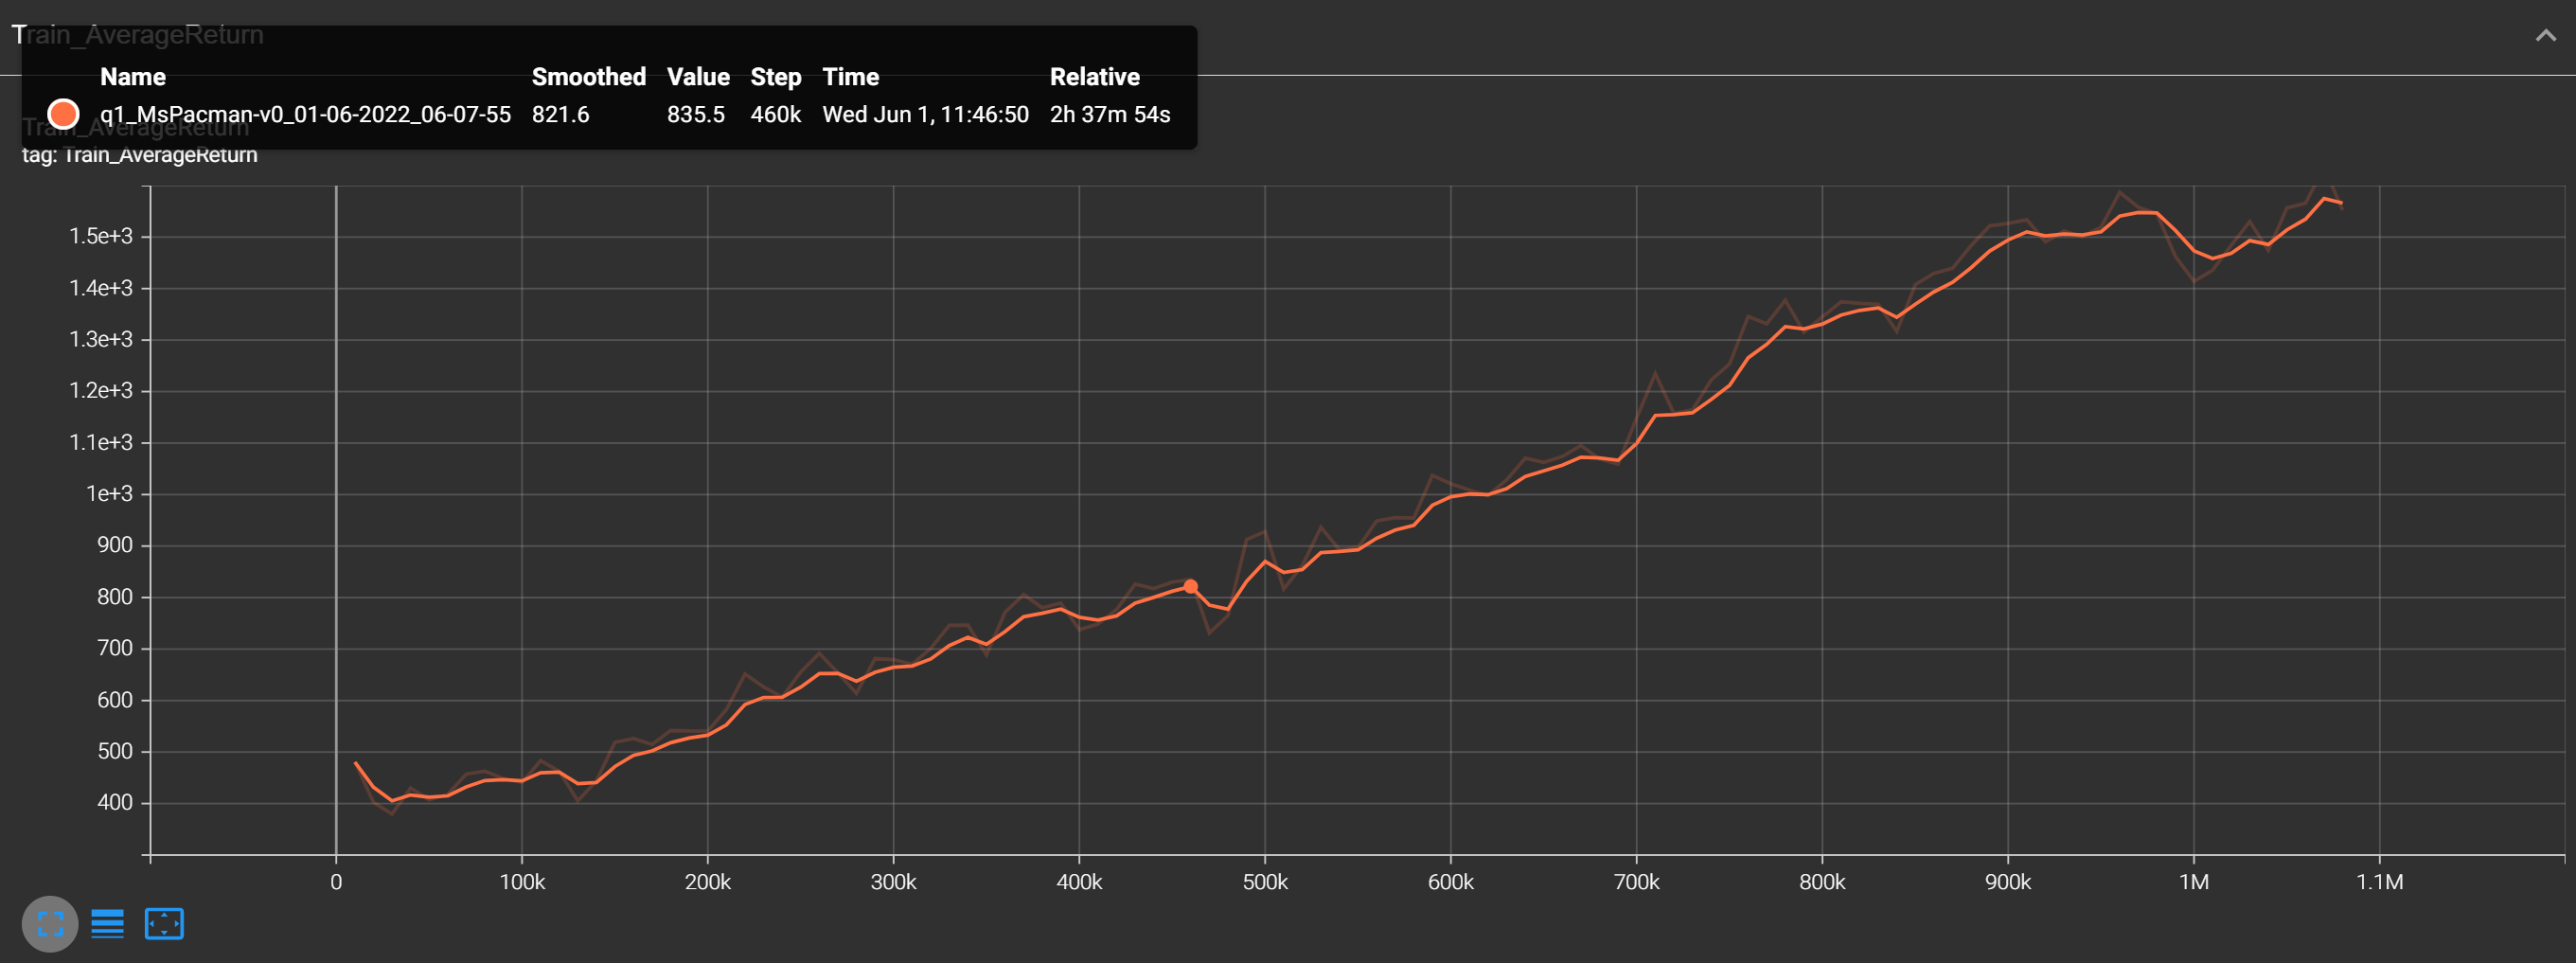

# Experiment 2. DQN vs DDQN

Run the following commands:

```
!python hw3/scripts/run_hw3_dqn.py --env_name LunarLander-v3 --exp_name q2_dqn_1 --seed 1
!python hw3/scripts/run_hw3_dqn.py --env_name LunarLander-v3 --exp_name q2_dqn_2 --seed 2
!python hw3/scripts/run_hw3_dqn.py --env_name LunarLander-v3 --exp_name q2_dqn_3 --seed 3
```

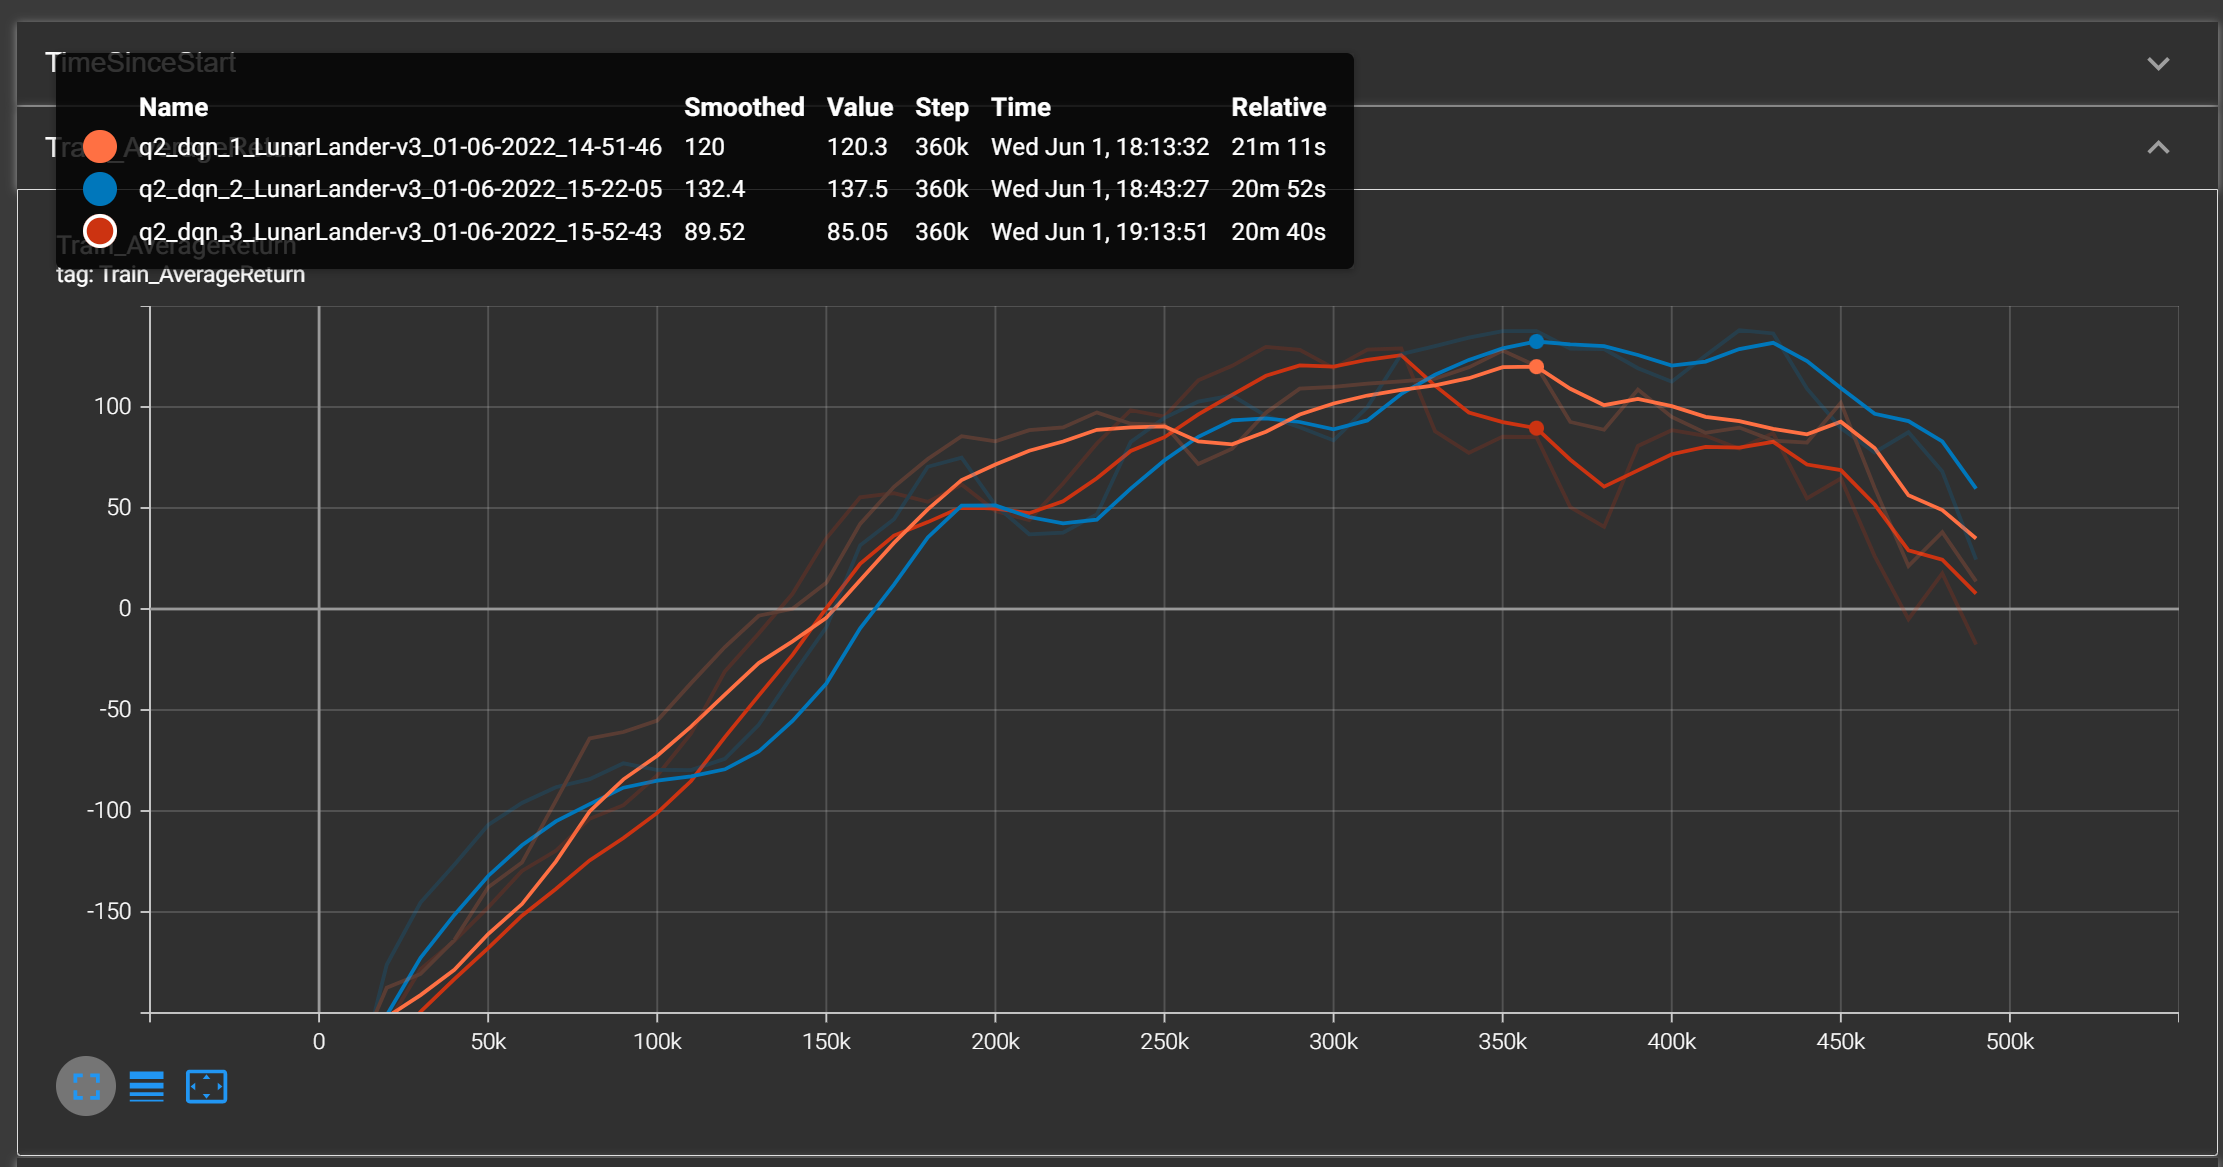

```
python hw3/scripts/run_hw3_dqn.py --env_name LunarLander-v3 --exp_name q2_doubledqn_1 -- double_q --seed 1
python hw3/scripts/run_hw3_dqn.py --env_name LunarLander-v3 --exp_name q2_doubledqn_2 -- double_q --seed 2
python hw3/scripts/run_hw3_dqn.py --env_name LunarLander-v3 --exp_name q2_doubledqn_3 -- double_q --seed 3
```

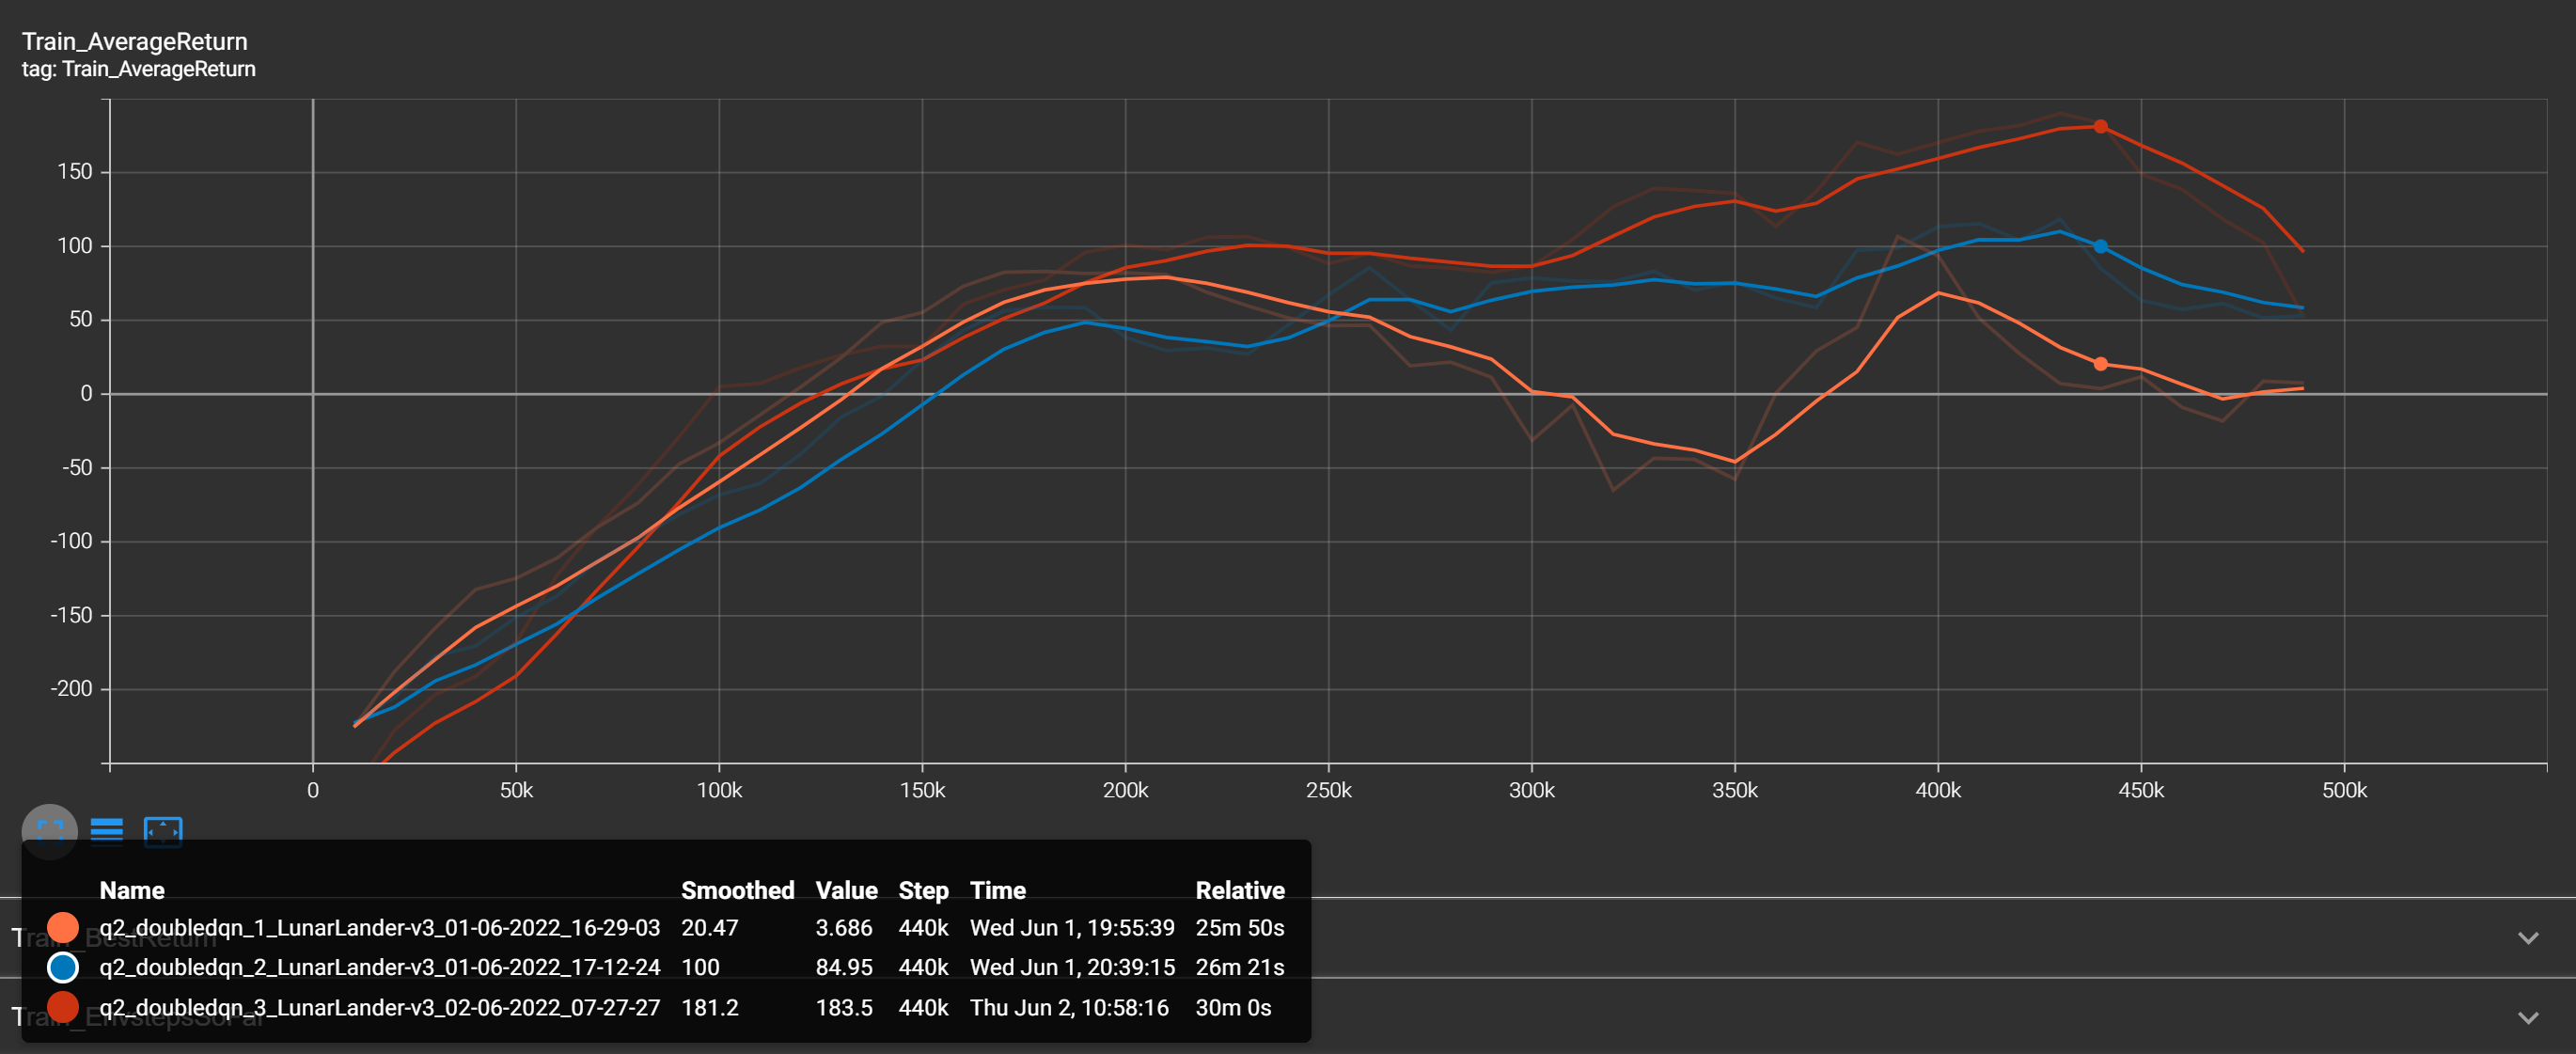

# Experiment 3. DQN hyperparameters

Compare different hyperparameters setups with the following commands:

```
python hw3/scripts/run_hw3_dqn.py --env_name LunarLander-v3 --exp_name q3_hparam1
python hw3/scripts/run_hw3_dqn.py --env_name LunarLander-v3 --exp_name q3_hparam2
python hw3/scripts/run_hw3_dqn.py --env_name LunarLander-v3 --exp_name q3_hparam3
```

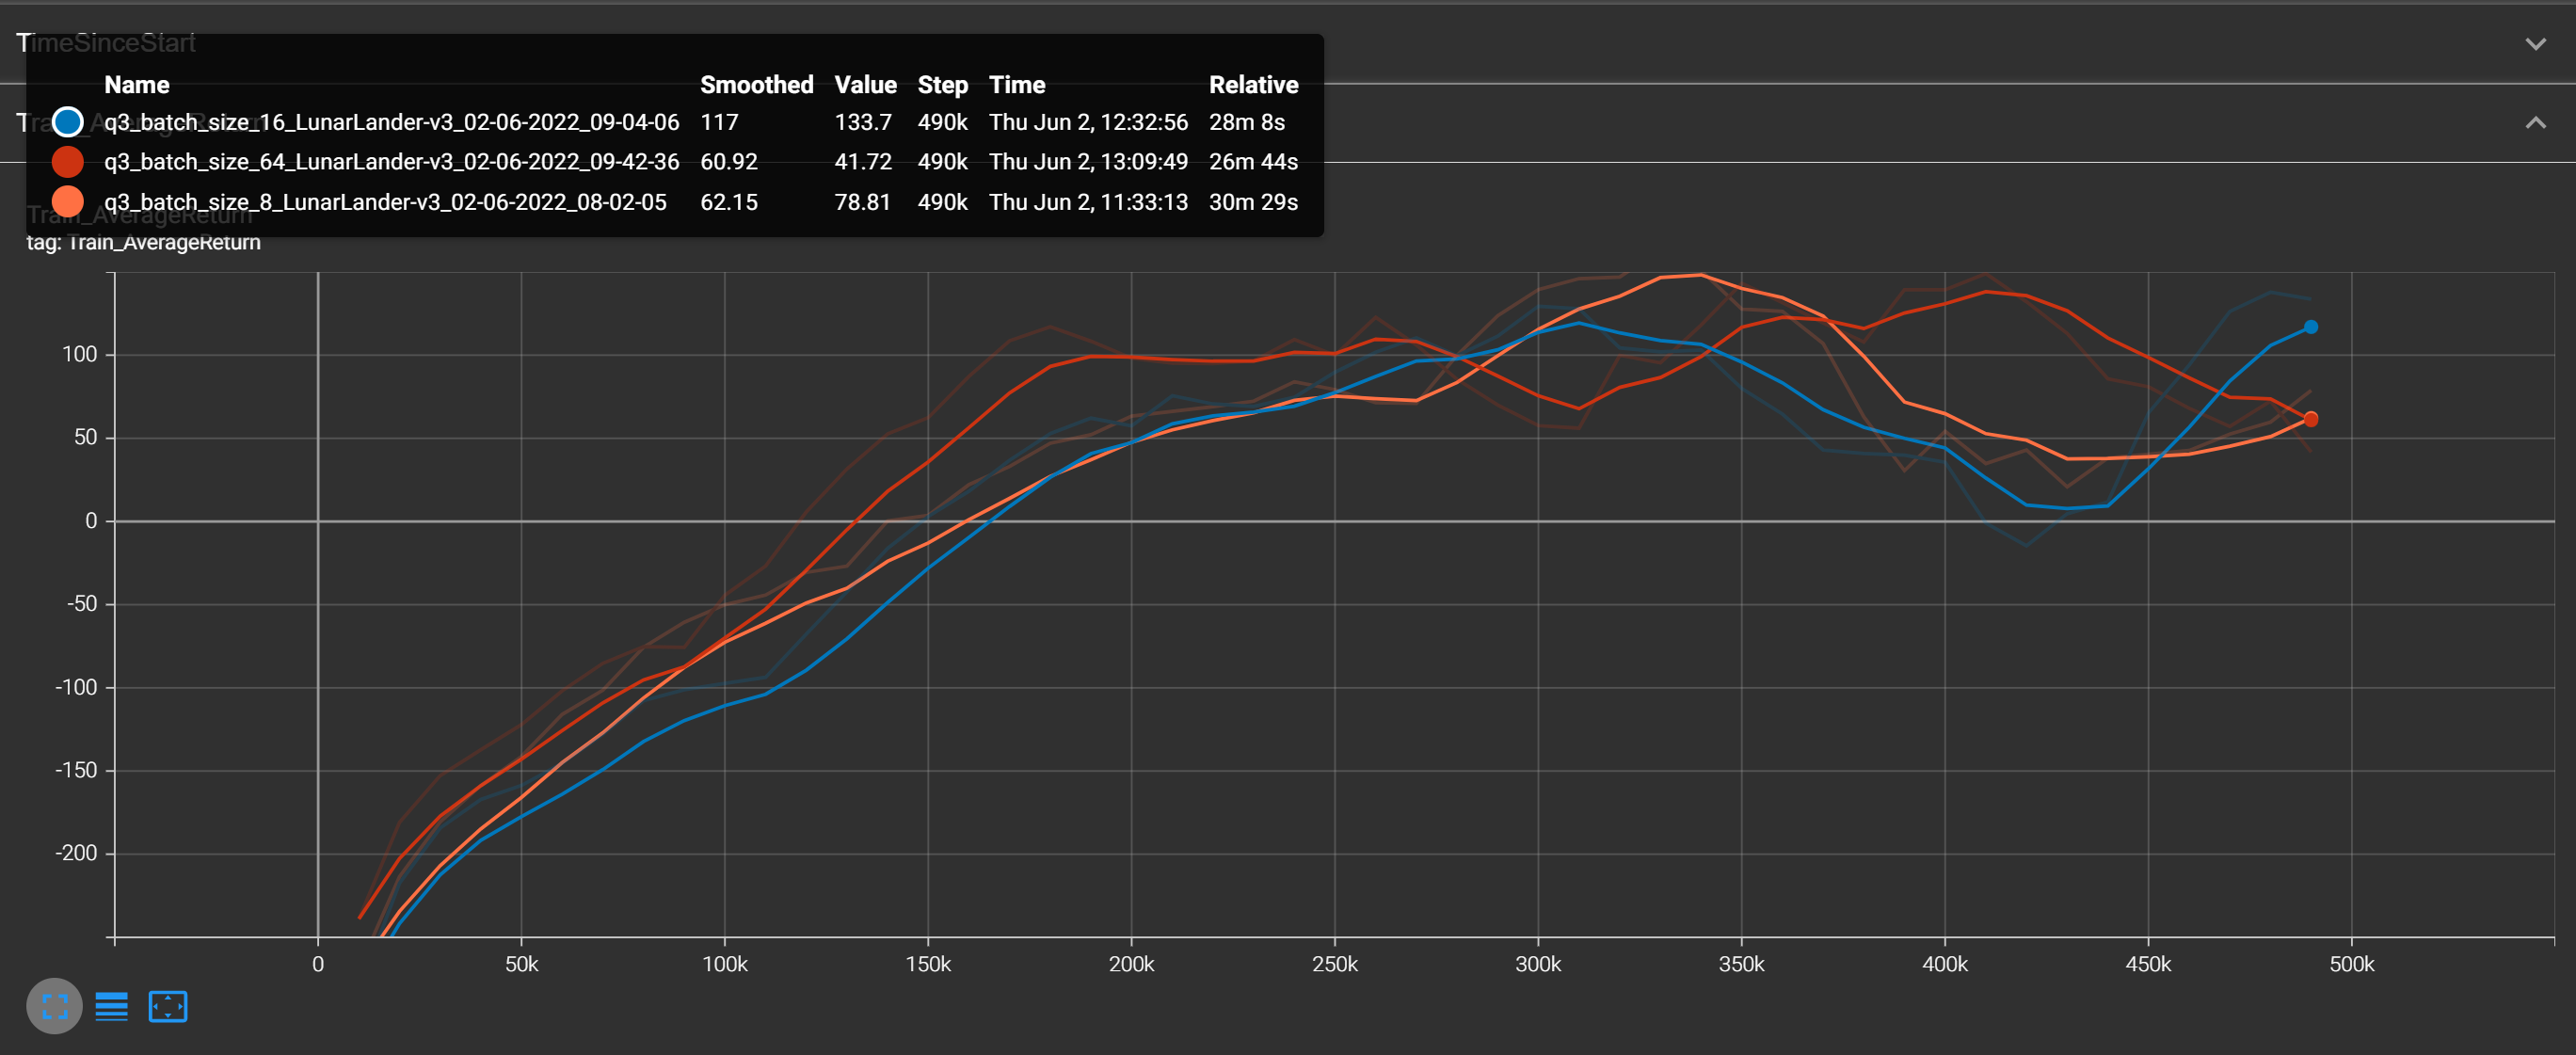

# Experiment 4. Sanity check with CartPole
Check that your solution works with the following command:

```
python hw3/scripts/run_hw3_actor_critic.py --env_name CartPole-v0 -n 100 -b 1000 --exp_name q4_ac_1_1 -ntu 1 -ngsptu 1

```

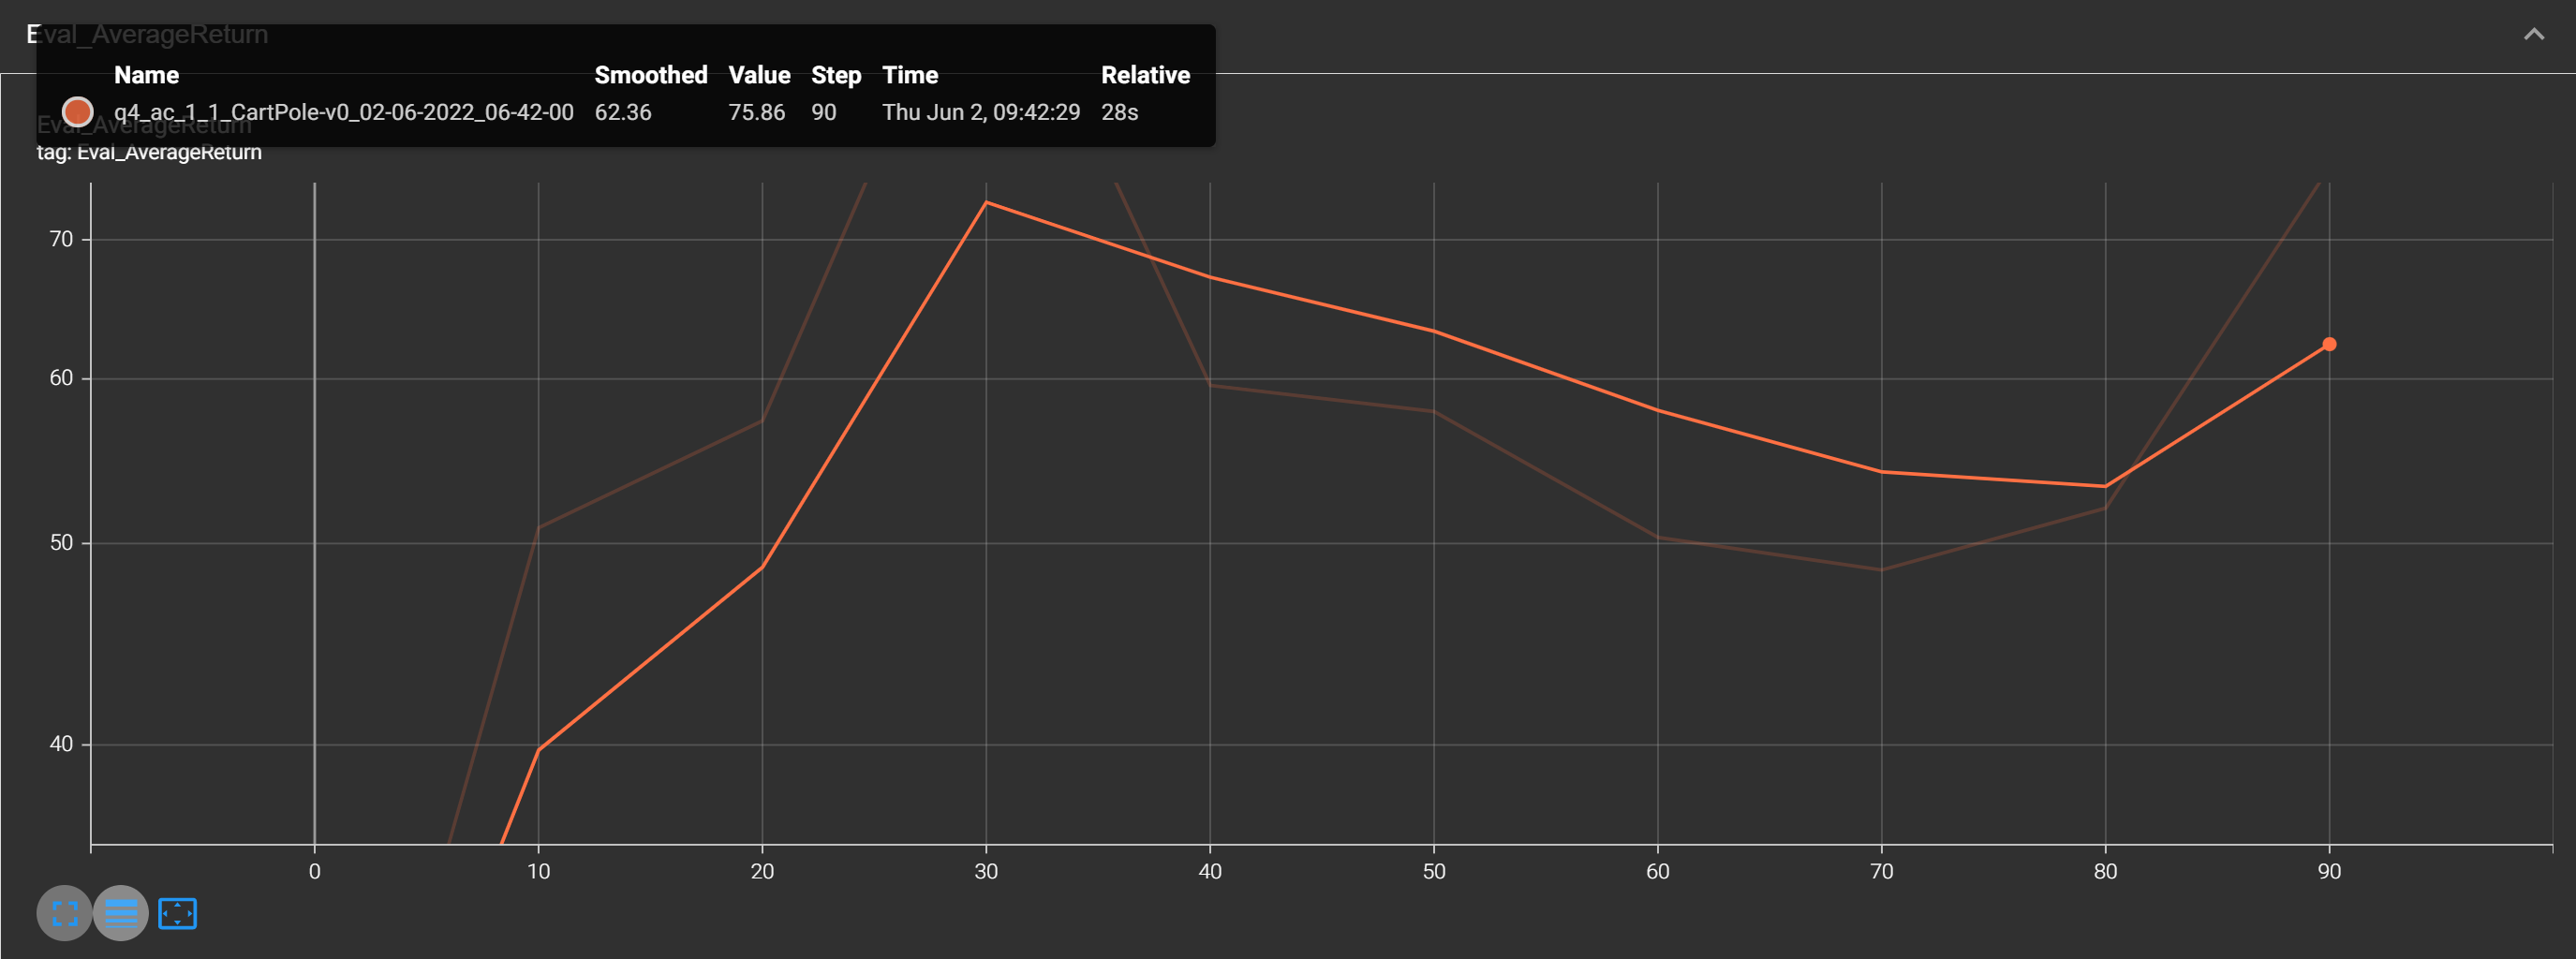

Compare the results for the following settings and report which worked best:

```
python hw3/scripts/run_hw3_actor_critic.py --env_name CartPole-v0 -n 100 -b 1000 --exp_name q4_100_1 -ntu 100 -ngsptu 1

python hw3/scripts/run_hw3_actor_critic.py --env_name CartPole-v0 -n 100 -b 1000 --exp_name q4_1_100 -ntu 1 -ngsptu 100

python hw3/scripts/run_hw3_actor_critic.py --env_name CartPole-v0 -n 100 -b 1000 --exp_name q4_10_10 -ntu 10 -ngsptu 10
```

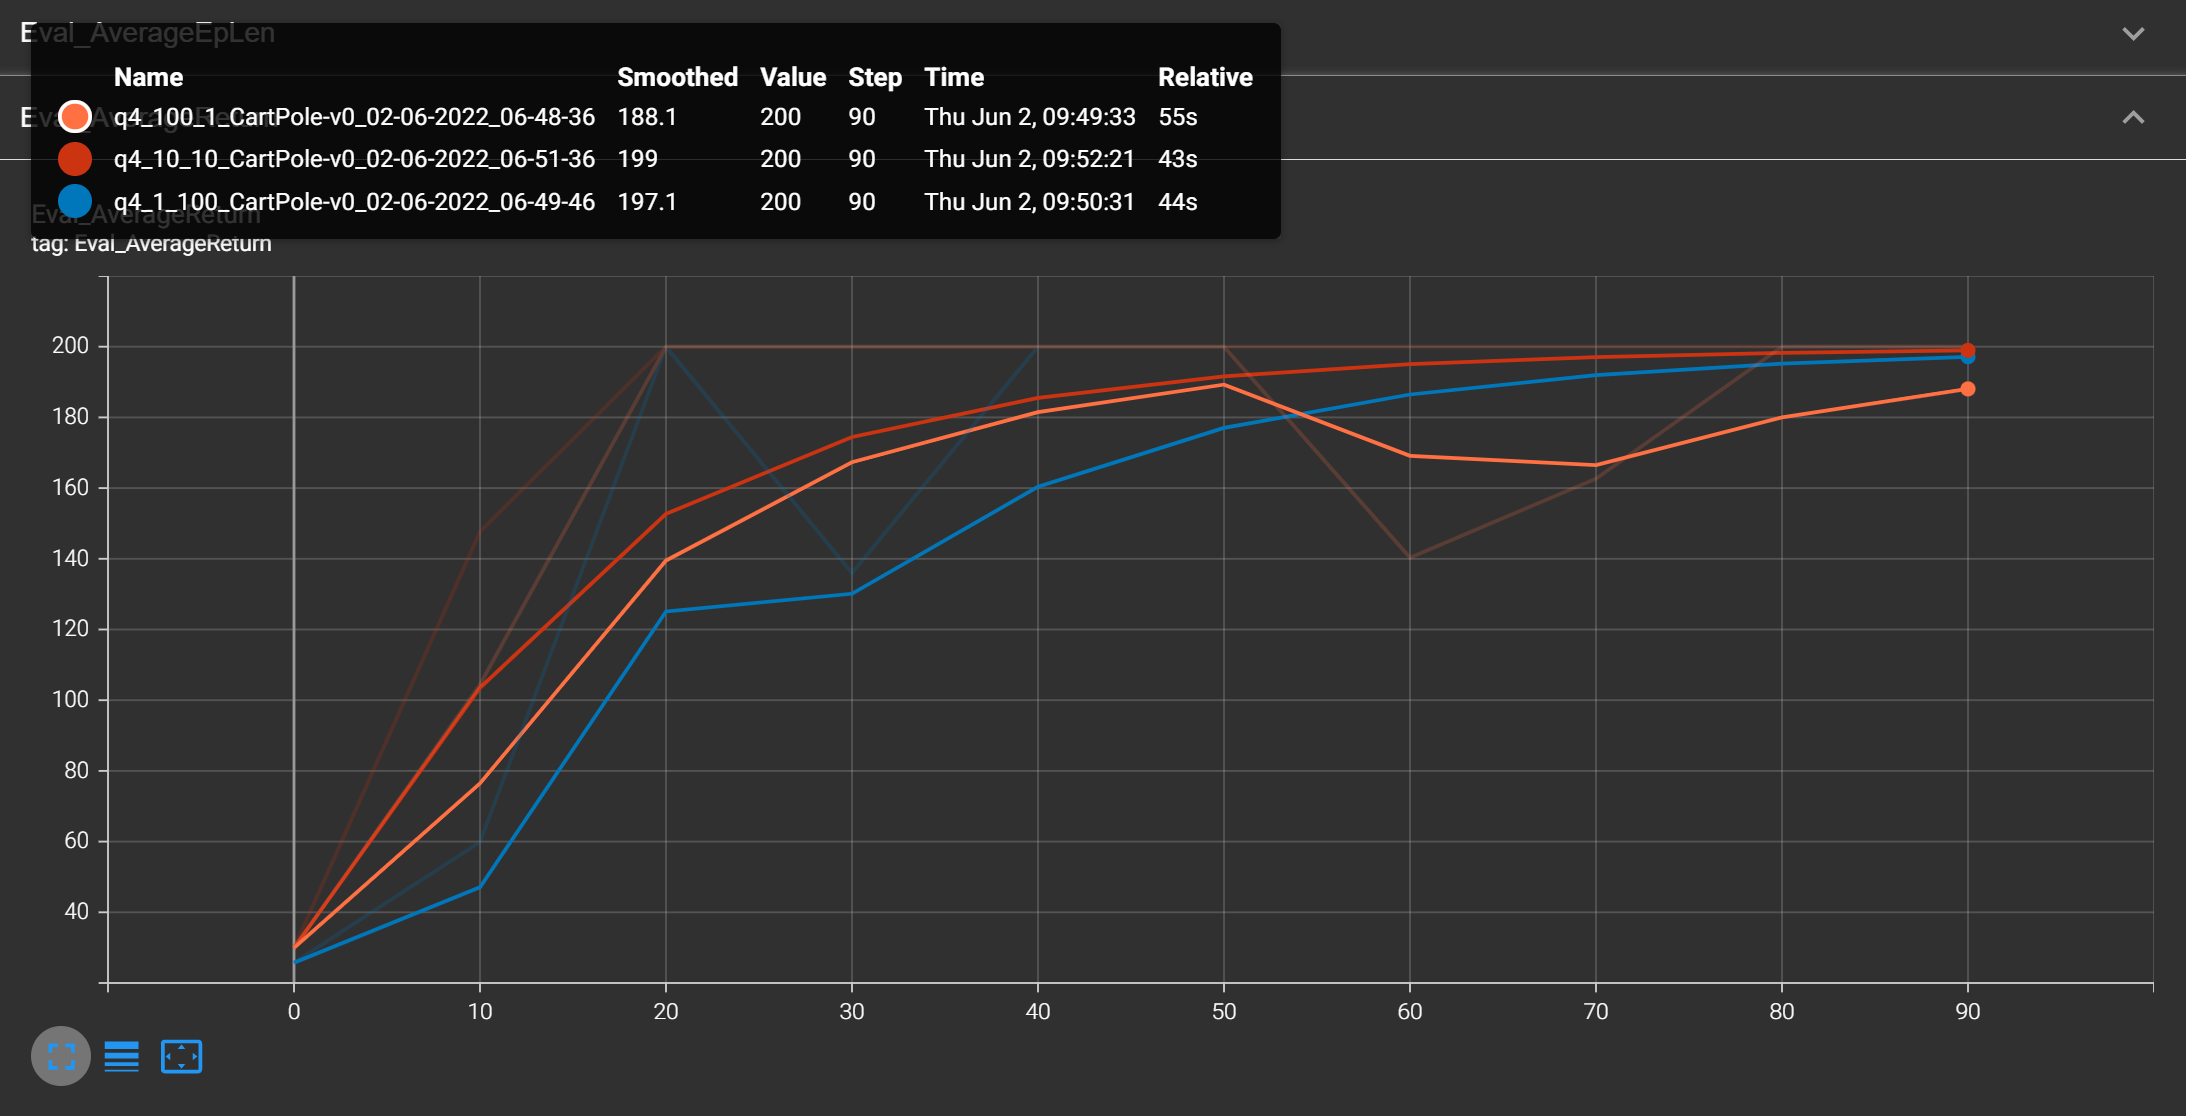

# Experiment 5. 
Run actor-critic with more difficult tasks
Use the best setting from the previous experiment to run InvertedPendulum

```
!python hw3/scripts/run_hw3_actor_critic.py --env_name InvertedPendulum-v2 --ep_len 1000 --discount 0.95 -n 100 -l 2 -s 64 -b 5000 -lr 0.01 --exp_name q5_10_10 -ntu 10 -ngsptu 10
```

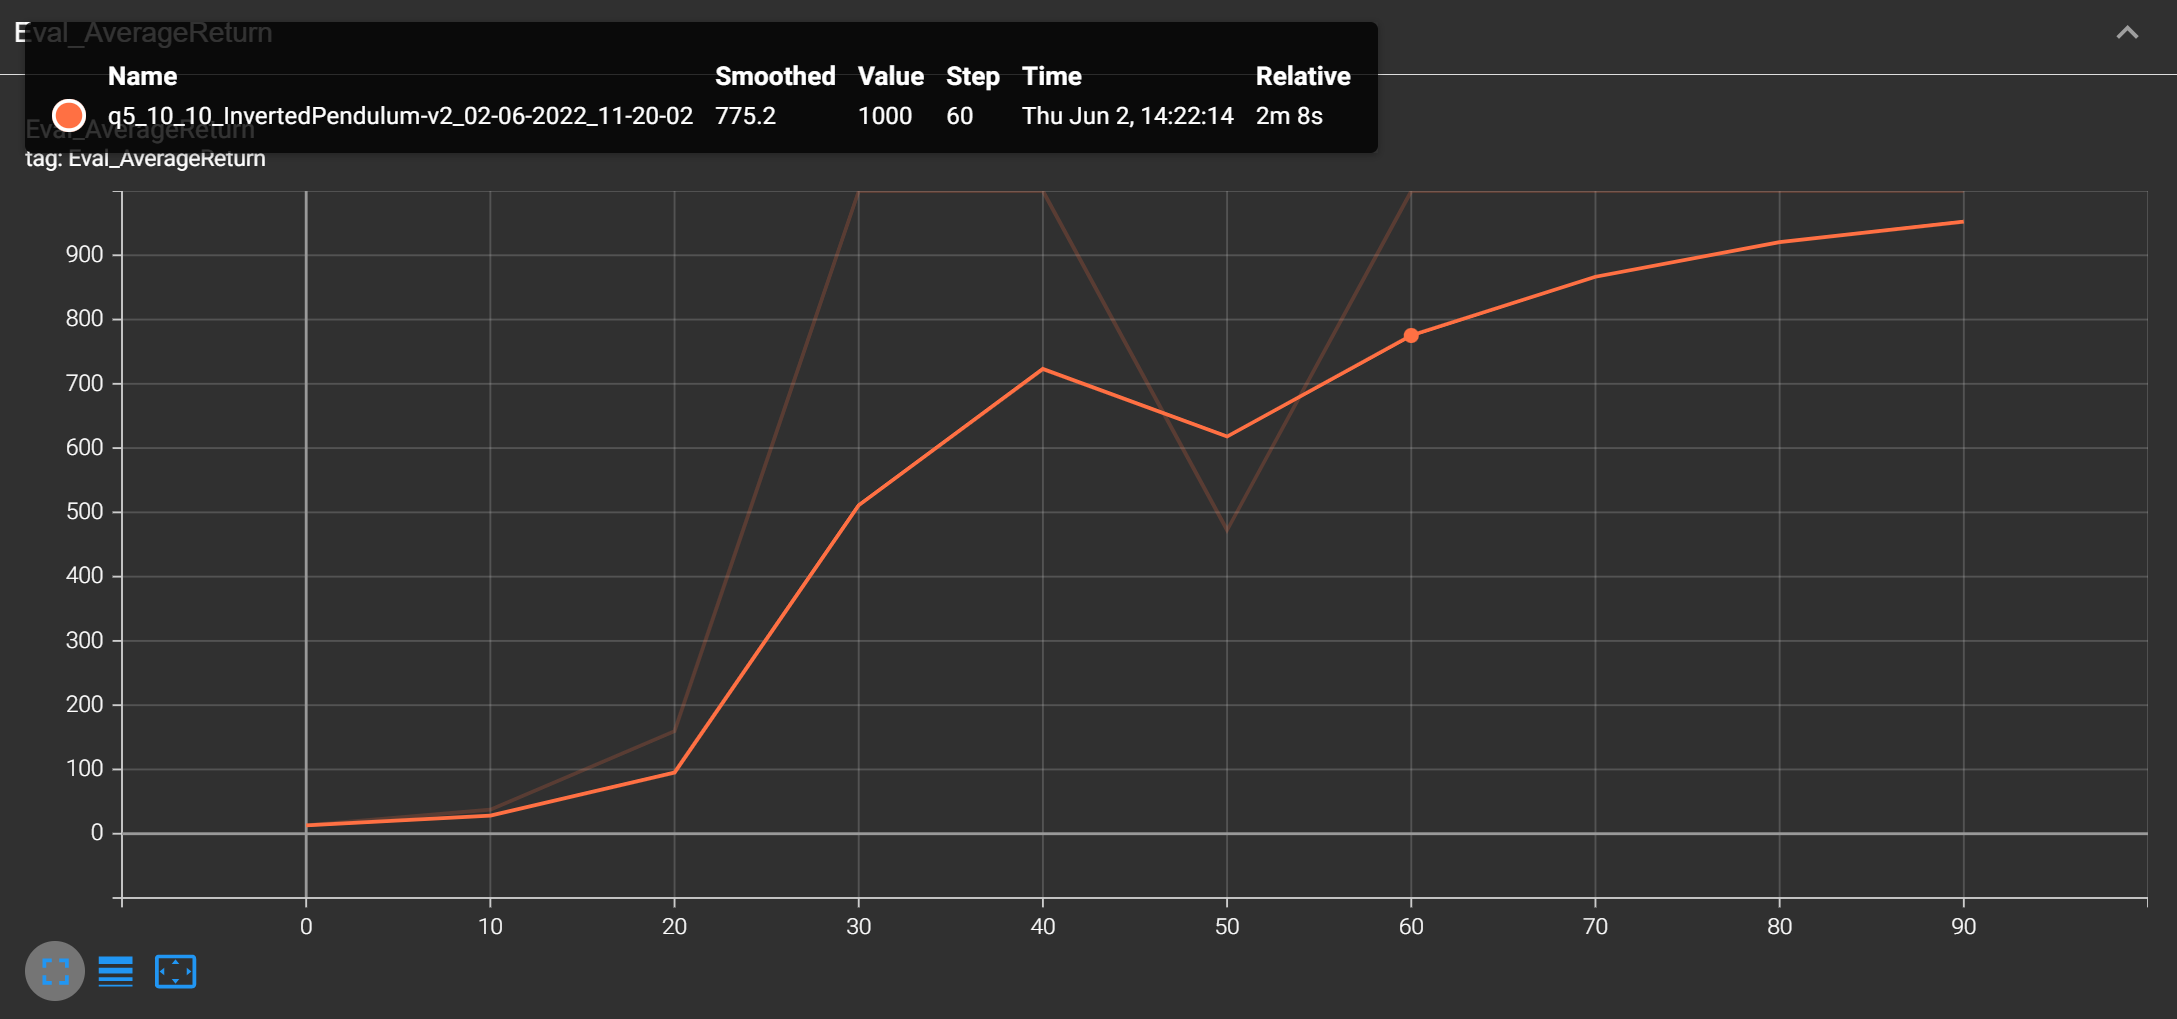

and HalfCheetah

```
python hw3/scripts/run_hw3_actor_critic.py --env_name HalfCheetah-v2 --ep_len 150 --discount 0.90 --scalar_log_freq 1 -n 150 -l 2 -s 32 -b 30000 -eb 1500 -lr 0.02 --exp_name q5_10_10 -ntu 10 -ngsptu 10

```

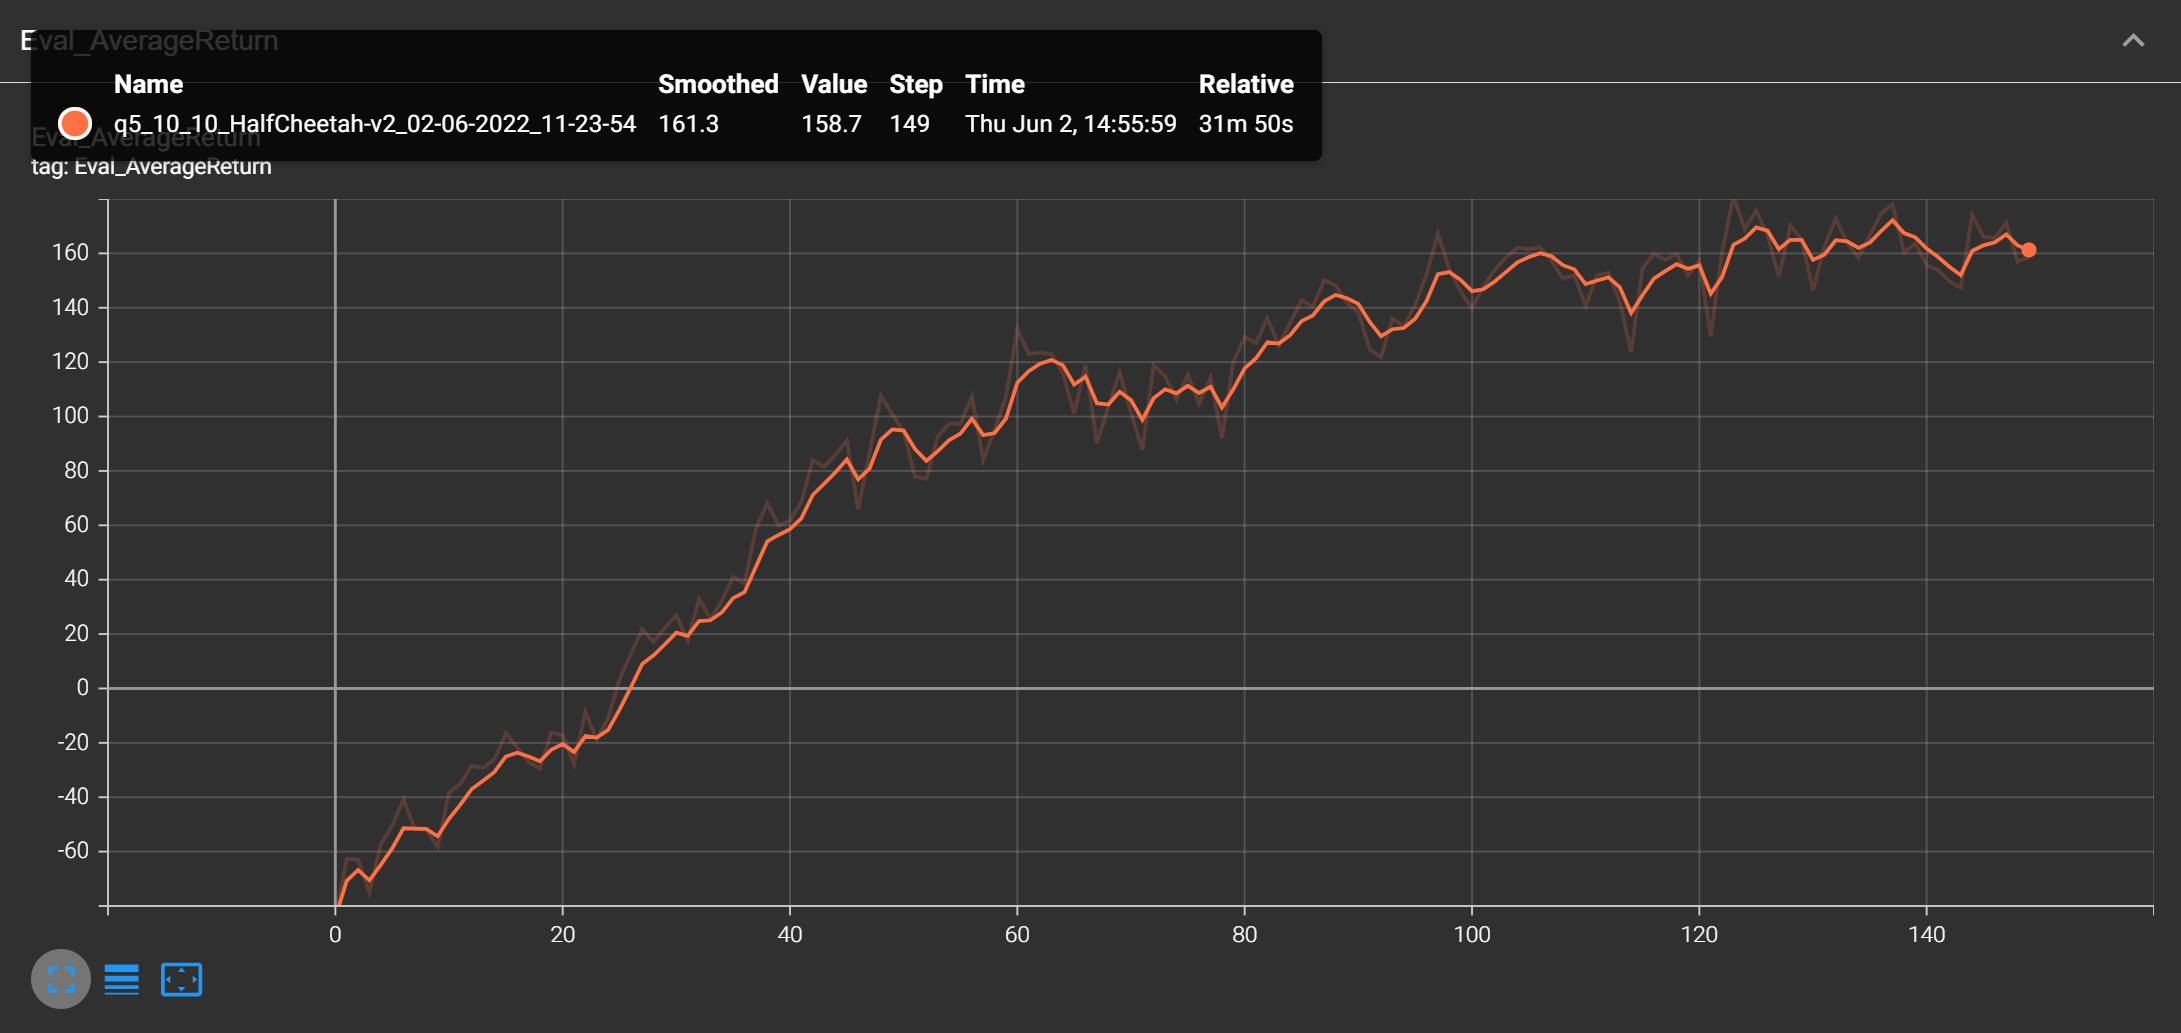

# Задание 1. Упражнение 10.6 книги Саттона и Барто. 

Расмотрим марковский
процесс (примечание: просто процесс, не МППР!), состоящий из трех состояний A, B,
C; переход производятся детерминированно по циклу. Вознаграждение +1 начисляется
по прибытии в состояние A, в остальных случаях оно равно 0. Каковы дифференциалы
для полезностей во всех трех состояний?
